In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling[notebook]
import pandas_profiling

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Loan=pd.read_csv('Loan_Modelling.csv')#save the data as Cardio

Univeraite and bivariate analysis

In [5]:
pandas_profiling.ProfileReport(Loan) #a profile of the data

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
Loan.info()#see missing info, size, names, and datatyes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


It seems to me that ID isn't great and ZIP may be the same

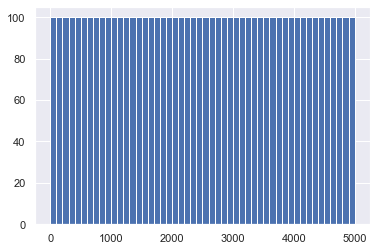

In [7]:
plt.hist(Loan['ID'],50)#it seems like each is unique so I don't think the number of bins is important
plt.show()

This is not meaningful AT ALL

In [8]:
id_loan=Loan['ID']
Loan.drop(['ID'], axis=1, inplace=True)

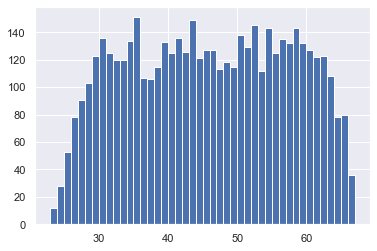

In [9]:
plt.hist(Loan['Age'],44)#23-67 is 44 year spread
plt.show()

Looks pretty normal

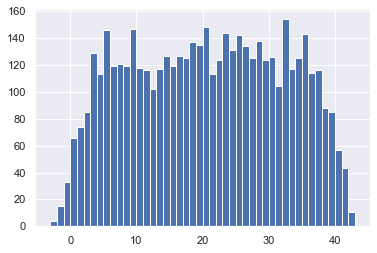

In [10]:
plt.hist(Loan['Experience'],46)#(-)3-43 is46 spread

Looks pretty normal

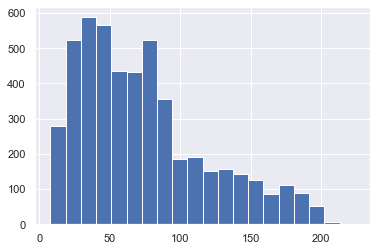

In [11]:
plt.hist(Loan['Income'],20)
plt.show()

Pretty bad left tail, there are people making over 100,000

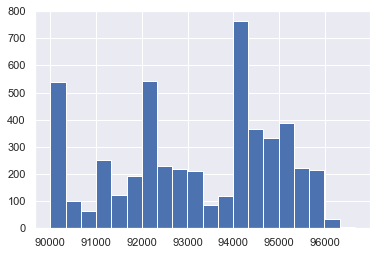

In [12]:
plt.hist(Loan['ZIPCode'],20)
plt.show()

No pattern, If I knew the distance from these to a center point that may be better

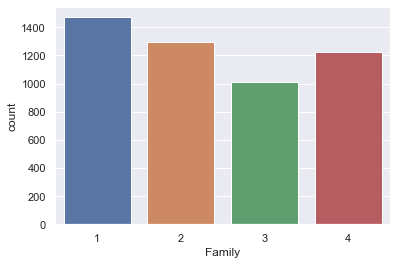

In [13]:
sns.countplot(Loan['Family'])
plt.show()

Good spread, but a good number are single and no families are above 4, weird

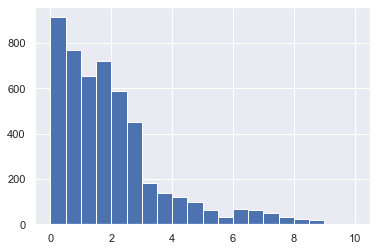

In [14]:
plt.hist(Loan['CCAvg'],20)# it looks like there are 108 unique values, so 20 should be enough
plt.show()

A lot of people dont use their credit card, or use is less than 1k a month. very few spend above 8k a month. I'd assume that most of these ae high income people, lets see

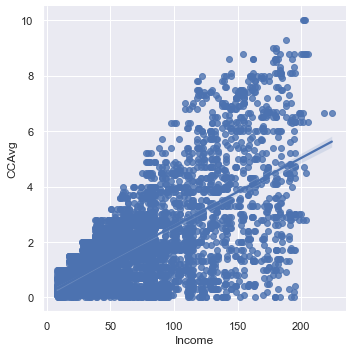

In [15]:
sns.lmplot(x='Income',y='CCAvg',data=Loan)
plt.show()

It seems all heavy cc users are higher income (roughly 100,000-200,000) but the reverse is not true, some "rich" people are not using their CC

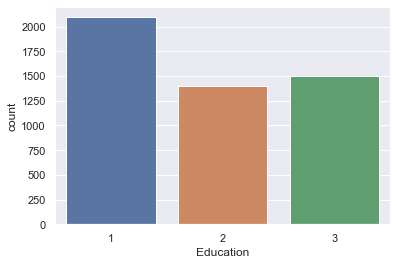

In [16]:
sns.countplot(Loan['Education'])
plt.show()

Most are undergrads, we see a high number of high education. I wonder if their are high school or lower?

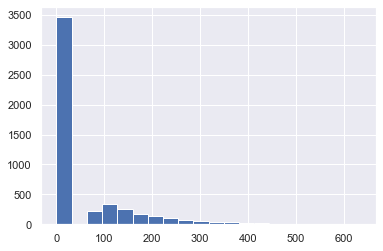

In [17]:
plt.hist(Loan['Mortgage'],20)
plt.show()

Almost all are zero, but this isn't bad?

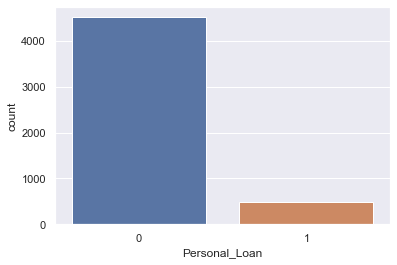

In [18]:
sns.countplot(Loan['Personal_Loan'])
plt.show()

90%+ did not accept our loan last time

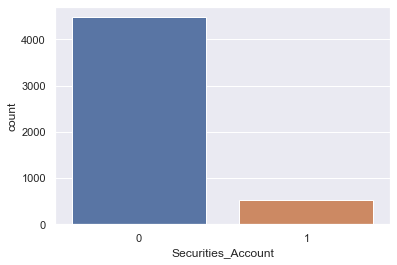

In [19]:
sns.countplot(Loan['Securities_Account'])
plt.show()

Almost no one had a security account at our bank

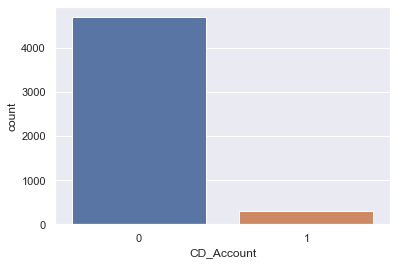

In [20]:
sns.countplot(Loan['CD_Account'])
plt.show()

Even ewer have a certifcate deposit account

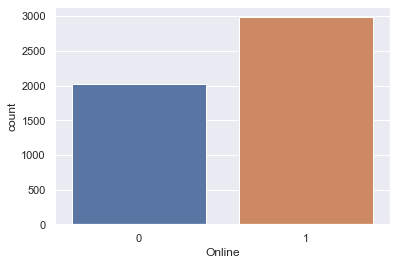

In [21]:
sns.countplot(Loan['Online'])
plt.show()

A small majority do use online banking facilities

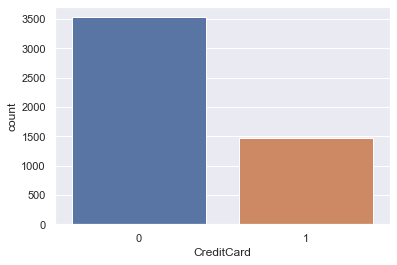

In [22]:
sns.countplot(Loan['CreditCard'])
plt.show()

Riughly 2/3 do not use another banks' credit card
Let's start bivariate

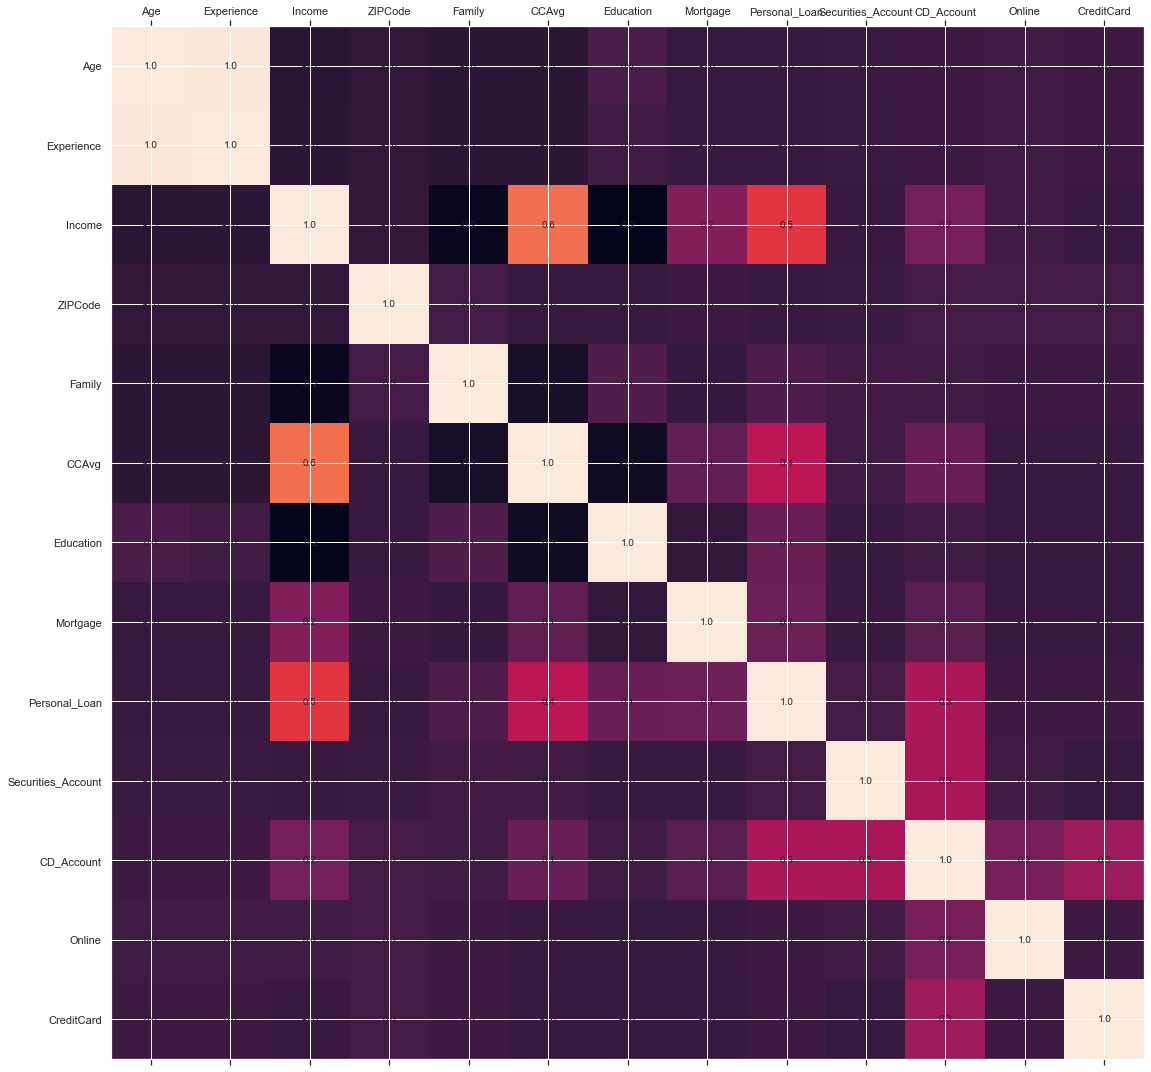

In [23]:
import numpy as np
def plot_corr(df, size=19):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(Loan)

Personal loan correlation
Positive high: income, ccavg, and cdaccount
Negative high:None 
Others:ccavg and income CDaccount and credit cad securities acount and cd account
Age and experience are 1!

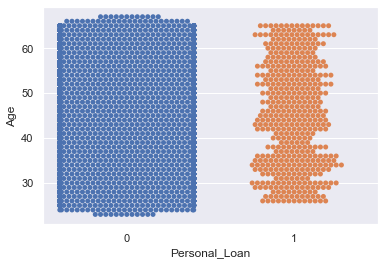

In [24]:
sns.swarmplot(x='Personal_Loan',y='Age',data=Loan)
plt.show()

There is not a lot of good info here. Though no one bellow about 25 acceptes

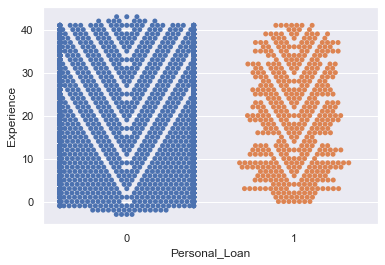

In [25]:
sns.swarmplot(x='Personal_Loan',y='Experience',data=Loan)
plt.show()

Again nothing real

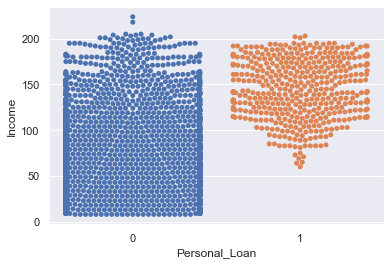

In [26]:
sns.swarmplot(x='Personal_Loan',y='Income',data=Loan)
plt.show()

No low income (bellow 50k) accepted our loans and it seems higher income will accept more often. Loans seem to be accepted more above aout 100k

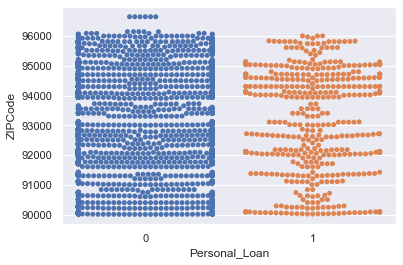

In [27]:
sns.swarmplot(x='Personal_Loan',y='ZIPCode',data=Loan)
plt.show()

I don't see a siginificant correlation 

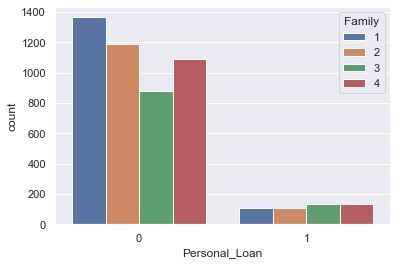

In [28]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['Family'])
plt.show()

SIngle people and people with only one other person in family are less likely to accept the loan and those with 3 or 4 people in the family are more likely to accept the loan

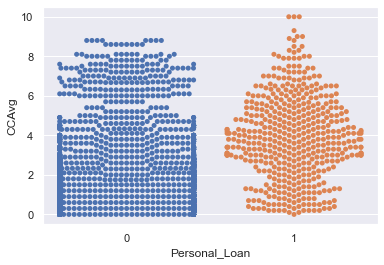

In [29]:
sns.swarmplot(x='Personal_Loan',y='CCAvg',data=Loan)
plt.show()

There does not seem to be a lot here but people with less than 2.5K are less likely to accept and anyone aboe 9k will accept

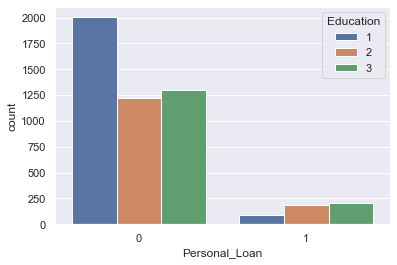

In [30]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['Education'])
plt.show()

Correlation, people with avbove undegrad education are more likely to accept but undergrads are less likely

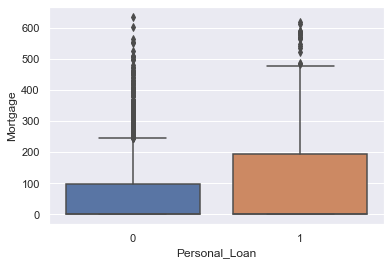

In [31]:
sns.boxplot(x='Personal_Loan', y='Mortgage',data=Loan)
plt.show()

Note: swarm plot was not working well here and took about 20 minutes with no result, I switched to boxplot
The IQR for people who did not accept loans was smaller,  but there is a significant overlap and there is no reason to believe there is a relationship

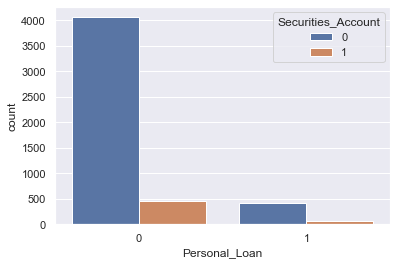

In [32]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['Securities_Account'])
plt.show()

No clear relationship here

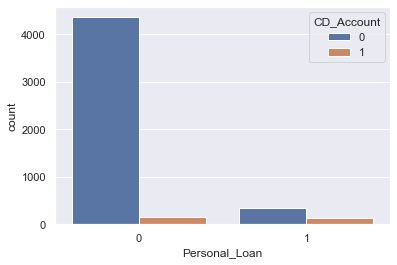

In [33]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['CD_Account'])
plt.show()

People with CD accounts appear slightly more likely yo accept the loan

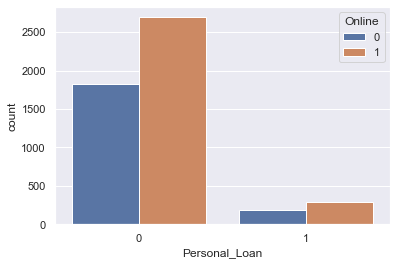

In [34]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['Online'])
plt.show()

People who bank online may be slighly more likely to accept the loan

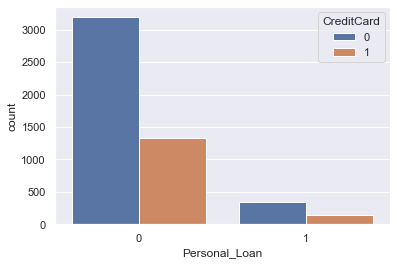

In [35]:
sns.countplot(Loan['Personal_Loan'], hue=Loan['CreditCard'])
plt.show()

No clear corrleation, but aivng a car from a second bank MAY lead to accepting the loan more often

Data preprocessing

In [36]:
Loan.isnull().sum().sort_values(ascending=False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values, move onto outlier
Let's check numeric

In [37]:
Loan['Age'].mean()

45.3384

In [38]:
Loan['Age'].median()

45.0

Age is good

In [39]:
Loan['Experience'].mean()

20.1046

In [40]:
Loan['Experience'].median()

20.0

Experience is good

In [41]:
Loan['Income'].mean()

73.7742

In [42]:
Loan['Income'].median()

64.0

Log income

In [43]:
Loan['Income_log']=np.log(Loan['Income'] + 1)

In [44]:
Loan['Income_log'].mean()

4.106952021481107

In [45]:
Loan['Income_log'].median()

4.174387269895637

Better

In [46]:
income_loan=Loan['Income']
Loan.drop(['Income'], axis=1, inplace=True)#no use in not keeping

In [47]:
Loan['ZIPCode'].mean()

93169.257

In [48]:
Loan['ZIPCode'].median()

93437.0

This is good, I think I will remove zip though as it hardly seems like we can get anyhting from it without knowing the city, type of location, or similiar

In [49]:
ZIP_loan=Loan['ZIPCode']
Loan.drop(['ZIPCode'], axis=1, inplace=True)#no use in not keeping

In [50]:
Loan['CCAvg'].mean()

1.9379380000000053

In [51]:
Loan['CCAvg'].median()

1.5

Off enough, lets log

In [52]:
Loan['CCAvg_log']=np.log(Loan['CCAvg'] + 1)

In [53]:
Loan['CCAvg_log'].mean()

0.929356184391149

In [54]:
Loan['CCAvg_log'].median()

0.9162907318741551

Not perfect, but better

In [55]:
cc_loan=Loan['CCAvg']
Loan.drop(['CCAvg'], axis=1, inplace=True)#no use in not keeping

In [56]:
Loan['Mortgage'].mean()

56.4988

In [57]:
Loan['Mortgage'].median()

0.0

Way off, most people (50+% have no mortage and a smaller number drive up mean)

In [58]:
Loan['Mortgage_log']=np.log(Loan['Mortgage'] + 1)

In [59]:
Loan['Mortgage_log'].mean()

1.566982279577219

In [60]:
Loan['Mortgage_log'].median()

0.0

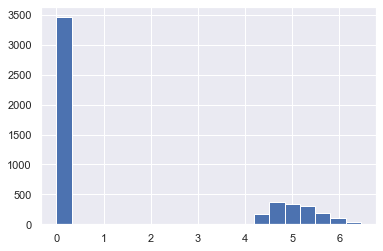

In [61]:
plt.hist(Loan['Mortgage_log'],20)
plt.show()

This did not work, maybe I will try zscore

In [62]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() 
Loan['Mortgage_z']=std_scaler.fit_transform(Loan[['Mortgage']])

In [63]:
Loan['Mortgage_z'].mean()

2.8101965199311964e-16

In [64]:
Loan['Mortgage_z'].median()

-0.5555239265453629

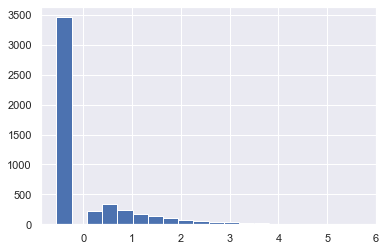

In [65]:
plt.hist(Loan['Mortgage_z'],20)
plt.show()

Maybe a little better, but not great, I will keep

In [66]:
mortgage_loan=Loan['Mortgage']
Loan.drop(['Mortgage'], axis=1, inplace=True)#no use in not keeping
Loan.drop(['Mortgage_log'], axis=1, inplace=True)

In [67]:
y=Loan['Personal_Loan']
X=Loan.drop(['Personal_Loan'],axis=1,inplace=False)

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # I will just use the defalt sizes

In [69]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [70]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

Coefficients
Age                    -0.009297
Experience              0.009384
Family                  0.026235
Education               0.065705
Securities_Account     -0.083191
CD_Account              0.376816
Online                 -0.026735
CreditCard             -0.050373
Income_log              0.128620
CCAvg_log               0.086709
Mortgage_z              0.015941
Intercept              -0.451933

Age: as people age, they seem slighly less likely to accept the loan, the high correlation w/ experience may nullify this
Experience: as peeopl become more expeirence, they seem slighly more likely to accept the lone, the high correlation w/ age may nullify this
Family (note I didn't one hot encode this as 1) the assignment of of number is menaingful and 2) w may see other number of family members in the future): people with larger families seem slightly more likely to accept the loan
Education  (note I didn't one hot encode this as 1) the assignment of of number is menaingful and 2) w may see other number of family members in the future): more educated people may be more likely to accept the loan
Security account: those without one will be more likely to accept
CD account: high correlation, those with are more likely to accept
Online: those that do not use are more likely to accept, contradict previous assumption
Credit card: those that don't use another banks card are more likely to accept, contradict previous assumption
Loged functions: these corrleations are likely more meaningful than the above implies
Income: higher income means they are more likely to accept. Likely one of our best intedactors
CCavg: higher spending means they will be more likely to accept
Z scored: these corrleations are likely more meaningful than the above implies
Mortgage: those with higher mortgages are more likely to accept

In [71]:
print("Original Accepted True Values    : {0} ({1:0.2f}%)".format(len(Loan.loc[Loan['Personal_Loan'] == 1]), (len(Loan.loc[Loan['Personal_Loan'] == 1])/len(Loan.index)) * 100))
print("Original Accepted False Values   : {0} ({1:0.2f}%)".format(len(Loan.loc[Loan['Personal_Loan'] == 0]), (len(Loan.loc[Loan['Personal_Loan'] == 0])/len(Loan.index)) * 100))
print("")
print("Training Success True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Success False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Success True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Success False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Accepted True Values    : 480 (9.60%)
Original Accepted False Values   : 4520 (90.40%)

Training Success True Values    : 331 (9.46%)
Training Success False Values   : 3169 (90.54%)

Test Success True Values        : 149 (9.93%)
Test Success False Values       : 1351 (90.07%)



Split well

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.24169  0.164149   0.317816        0.315665   inf

These numbers aren't good. Lets look at confusion mat

          0         1         2         3         4        5        6  \
0 -0.784066  0.775776  0.491474  1.447541 -1.038113  3.22139 -0.59985   

          7         8         9        10  intercept  
0 -1.061511  3.809271  1.137793  0.125746  -4.930196  


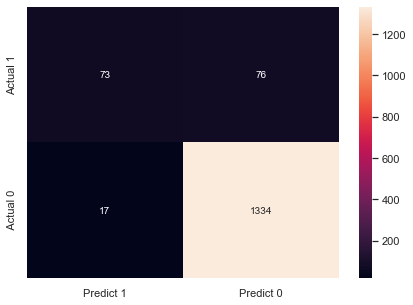

0.938


In [73]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train, y_train)
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()
model_score = model.score(x_test, y_test)
print(model_score)

Not great, we can predict easily when they won't accept with specificty of 1334/(1334+17)0.987 but sensitivty of 73/(73+76)=0.490
Inisghts from this portion this isn't great, but income, mortgae, CCAvg, and CC accounts all seem imprtant 

Let's do random tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dTree1 = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [75]:
from sklearn import metrics

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334
Recall on training set :  1.0
Recall on test set :  0.87248322147651


Honestly, not badd, lets vary max depth to see if it helps

In [76]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=1,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9054285714285715
Accuracy on test set :  0.9006666666666666
Recall on training set :  0.0
Recall on test set :  0.0


In [77]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=2,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9688571428571429
Accuracy on test set :  0.962
Recall on training set :  0.6706948640483383
Recall on test set :  0.6174496644295302


In [78]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


In [79]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=4,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9885714285714285
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9123867069486404
Recall on test set :  0.8657718120805369


In [80]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9908571428571429
Accuracy on test set :  0.98
Recall on training set :  0.9516616314199395
Recall on test set :  0.8859060402684564


In [81]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9928571428571429
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.945619335347432
Recall on test set :  0.87248322147651


Getting better!

In [82]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=7,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9945714285714286
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.9546827794561934
Recall on test set :  0.87248322147651


Recall and accuracy both peek at depth =6
Let's change min leaf size

In [83]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=1,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9928571428571429
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.945619335347432
Recall on test set :  0.87248322147651


In [84]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=2,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9925714285714285
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.9425981873111783
Recall on test set :  0.87248322147651


In [85]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=3,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9922857142857143
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.9395770392749244
Recall on test set :  0.87248322147651


In [86]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=4,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.992
Accuracy on test set :  0.98
Recall on training set :  0.9335347432024169
Recall on test set :  0.8657718120805369


In [87]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=5,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9911428571428571
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9365558912386707
Recall on test set :  0.87248322147651


 A max depth of 6 and max leaf size of 5 are ideal,let's do a grid search to make sure we didn't miss anything

In [107]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10, None], 
              'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
             'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]

             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='recall',cv=3)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=1)

Check it's score? 

In [108]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9902857142857143
Accuracy on test set :  0.9806666666666667
Recall on training set :  0.9395770392749244
Recall on test set :  0.8791946308724832


Ok so it did well with training but not as well with test, I will stick with my original number

In [109]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,min_samples_leaf=5,random_state=1)
dTree1.fit(x_train, y_train)

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9911428571428571
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9365558912386707
Recall on test set :  0.87248322147651


Importance matrix

In [91]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.432106
Income_log          0.321145
Family              0.157759
CCAvg_log           0.041920
CD_Account          0.024415
Experience          0.015407
Mortgage_z          0.004652
Age                 0.002597
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


education and income are most important, family and CCAVg also atleast somewhat important
Now, let's do some post pruning

In [92]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [93]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000381    0.005168
9     0.000409    0.006804
10    0.000435    0.007240
11    0.000476    0.007716
12    0.000508    0.008224
13    0.000578    0.010537
14    0.000582    0.011119
15    0.000621    0.011740
16    0.000769    0.014817
17    0.000792    0.017985
18    0.001552    0.019536
19    0.002333    0.021869
20    0.003024    0.024893
21    0.003294    0.028187
22    0.006473    0.034659
23    0.023866    0.058525
24    0.056365    0.171255

For obvious reason, impurities increase with ccp alpha 

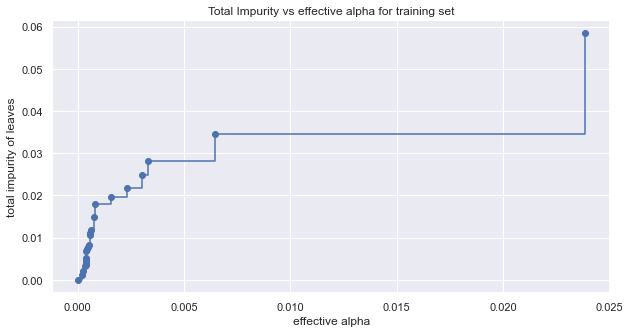

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [95]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


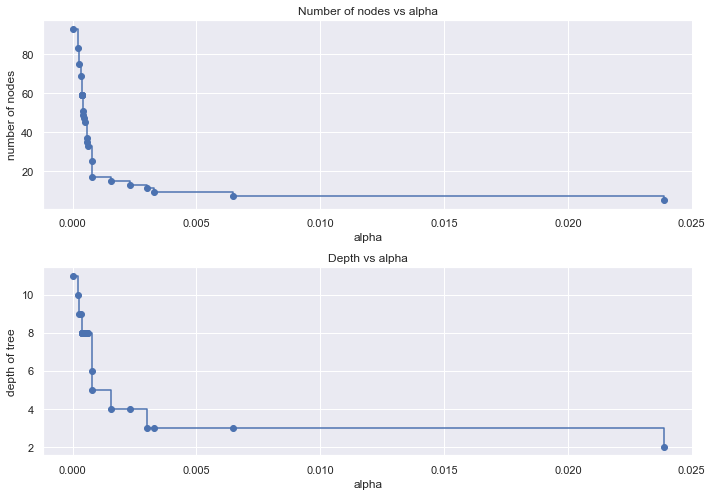

In [96]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [97]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

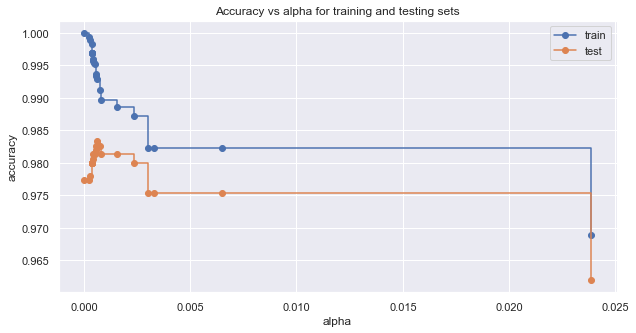

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [99]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.9833333333333333


This makes sense, about what we got before
recall is iportant here too, as we don't have pay back rates we will want to look at who WILL accept the loan

In [100]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [101]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [102]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [103]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


Confusion matrix time

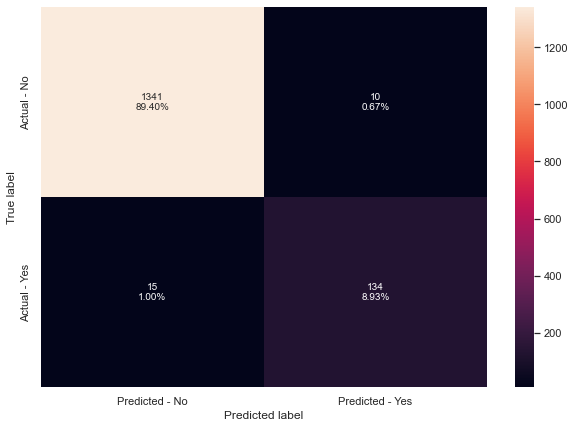

In [104]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
make_confusion_matrix(best_model,y_test)

Specificty= 1341/1351=0.993 alittle better than linear regresion
Sensitivty= 134/149=0.899 this is much better than lin regression, I would HIGHLY recommend using a decisoon tree with depth 6 and leaf size 5 for future studies
Let's look at importance mat agai

In [105]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.432106
Income_log          0.321145
Family              0.157759
CCAvg_log           0.041920
CD_Account          0.024415
Experience          0.015407
Mortgage_z          0.004652
Age                 0.002597
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


Insights
1: use a decision tree with depth 6 and leaf size 5
2: focus on high income indivudals (from previous part we saw this was positive relationship)
3: focus on people with above an undegrad education, as again we saw a positive rleationship
4: focus on fmailies of 3+ (likely having atleast one kid or other dependnet) as we say larger fmailies had a positive relationship with acceptance
5: do not focus too much on age or experience as long as it doesn't impact previous points
6: area (zip) is mostly meaningless, hint why it is removed
7: We don't care if they use online portal or if they have another banks' card/
8:DO NOT USE TO PREDICT WHO WILL PAY OFF LOANS